In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Stavan/Desktop/data.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<AxesSubplot:>

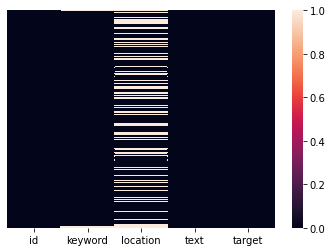

In [6]:
sns.heatmap(df.isnull(), yticklabels=False)

In [8]:
df.drop(['location','keyword'], axis=1, inplace=True)
df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
real = df[df['target'] == 1]

In [15]:
fake = df[df['target'] == 0]

In [18]:
print('Percentage of Real Messages: ', round((len(real)/len(df)*100),2), '%')

Percentage of Real Messages:  42.97 %


In [19]:
print('Percentage of Fake Messages: ', round((len(fake)/len(df)*100),2), '%')

Percentage of Fake Messages:  57.03 %


<AxesSubplot:xlabel='target', ylabel='count'>

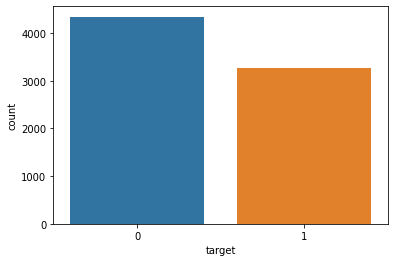

In [20]:
# data visualization
sns.countplot(df['target'])

In [22]:
# looks like we have a quite balanced dataset!

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
# data cleaning
lemme = WordNetLemmatizer()
corpus = []
for i in range(len(df)):
    d_cleaning = re.sub('[^a-zA-Z]',' ',df['text'][i])
    d_cleaning = d_cleaning.lower()
    d_cleaning = d_cleaning.split()
    d_cleaning = [ lemme.lemmatize(word) for word in d_cleaning if word not in stopwords.words('english')]
    d_cleaning = ' '.join(d_cleaning)
    corpus.append(d_cleaning)

In [34]:
# applying Countvectorizer
# creating Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [36]:
x.shape

(7613, 20679)

In [37]:
# so there are 7613 tweets and 21637 unique words.

In [38]:
x # independent variable
y = df['target'] # dependent variable

In [42]:
# training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [43]:
len(X_train), len(X_test)

(5709, 1904)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [46]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = MultinomialNB()

In [47]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
nb.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
# make predictions
predict1 = lr.predict(X_test)
predict2 = dt.predict(X_test)
predict3 = nb.predict(X_test)
predict4 = rf.predict(X_test)

In [51]:
# check the performance
from sklearn.metrics import accuracy_score

print('Logistic Regression: ',accuracy_score(y_test,predict1))
print('Decision Tree: ',accuracy_score(y_test,predict2))
print('Naive Bais: ',accuracy_score(y_test,predict3))
print('Random Forest:',accuracy_score(y_test,predict4))

Logistic Regression:  0.7983193277310925
Decision Tree:  0.7494747899159664
Naive Bais:  0.7946428571428571
Random Forest: 0.7935924369747899


In [52]:
# Disclaimer-

# You can increase the accuracy a little more by setting 'max_feature' & 'ngram_range' in CountVectorizer